# Tracer la ligne d'horizon d'une image

In [152]:
import cv2 # pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt

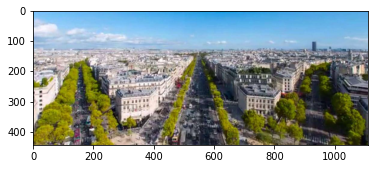

In [153]:
image = cv2.imread('test_paris.jpg') 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # (pour avoir les couleurs d'origine)
plt.show()

### Première idée : tracer les contours dans l'image

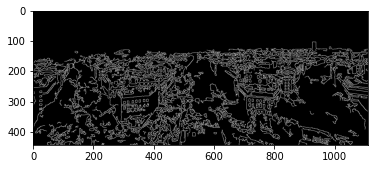

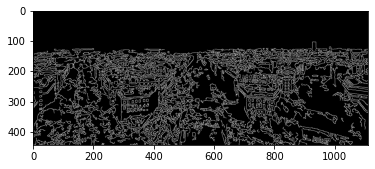

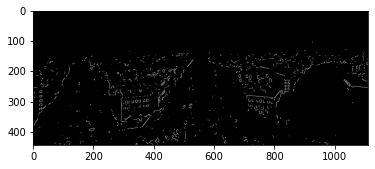

In [154]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

wide = cv2.Canny(blurred, 10, 200)
mid = cv2.Canny(blurred, 30, 150)
tight = cv2.Canny(blurred, 240, 250)

plt.imshow(wide, cmap = 'gray')
plt.figure()
plt.imshow(mid, cmap = 'gray')
plt.figure()
plt.imshow(tight, cmap = 'gray')
plt.show()

En prenant alors le pixel blanc le plus haut, de chaque colonne de pixels, on peut obtenir une ligne d'horizon :

In [155]:
np.shape(mid)

(444, 1111)

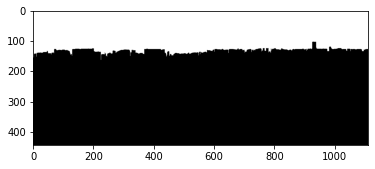

In [156]:
def horizon_from_edges(edges_image):
    shape = np.shape(edges_image)
    args = []
    for line in edges_image.T: 
        args.append(np.argmax(line))

    horizon = np.zeros(shape)
    for i in range(shape[1]):
        horizon[:args[i], i]= 255
    return(horizon)

horizon = horizon_from_edges(mid)

plt.imshow(horizon, cmap = 'gray')
plt.show()

### Deuxième idée : seuiller l'image pour ne garder que les pixels de la couleur du ciel

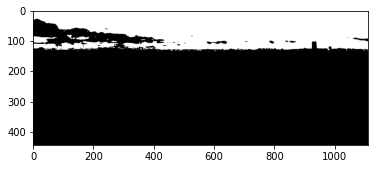

In [157]:
def thresholg_image(image, b=200, rg=210):  
    (B, G, R) = cv2.split(image)

    mask1 = B<b # supress the pixels with not enough blue
    mask2 = (R+0.2*G)>rg # supress the pixels too red or green
    # Rq : ce masque est à améliorer en précisant un peu mieux la couleur du ciel : peut-être utile de la préciser en entrée du code
    mask = mask1 | mask2

    thresh = image.copy()
    thresh[mask] = 0
    thresh[~mask]=255
    return(thresh)

threshold = thresholg_image(image)
plt.imshow(threshold, cmap = 'gray')
plt.show()

On garde lors le pixel blanc le plus bas de chaque colonne pour tracer l'horizon

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


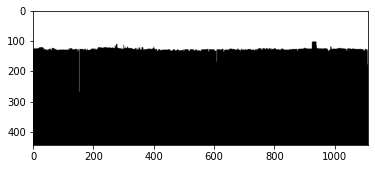

In [158]:
def horizon_from_threshold_not_corrected(image):
    shape = np.shape(image)
    for line in image.T[1]:
        args.append(shape[0]-np.argmax(line[::-1]))

    horizon = np.zeros(shape)
    for i in range(shape[1]):
        horizon[:args[i], i]= [255,255,255]
    return(horizon)
horizon2 = horizon_from_threshold_not_corrected(threshold)
plt.imshow(horizon2, cmap = 'gray')
plt.show()

Avec une petie correction pour éviter les pixels couleur ciel trop bas

In [159]:
np.shape(image)


(444, 1111, 3)

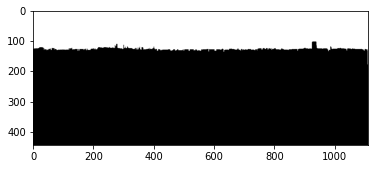

In [160]:
def horizon_from_threshold(image):
    shape = np.shape(image)
    args = []
    for line in image.T[1]: 
        args.append(shape[0]-np.argmax(line[::-1]))

    horizon = np.zeros(shape[:-1])
    horizon[:args[0], 0]= 255
    horizon[:args[shape[1]-1], shape[1]-1]= 255
    for i in range(1, shape[1]-1):
        if abs(args[i]-args[i+1]) < 30 or abs(args[i]-args[i-1]) < 30 :
            horizon[:args[i], i]= 255
        else :
            horizon[:args[i-1], i]= 255
    return(horizon)

horizon2 = horizon_from_threshold(threshold)
plt.imshow(horizon2, cmap = 'gray')
plt.show()

#### Finalement : les fonctions des deux méthodes

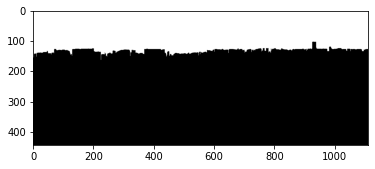

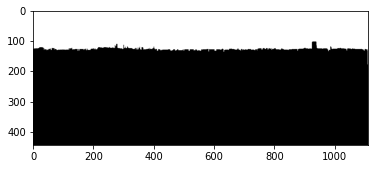

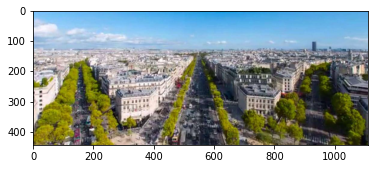

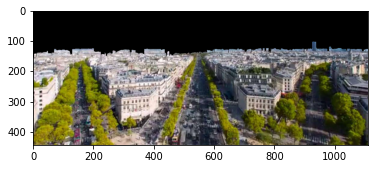

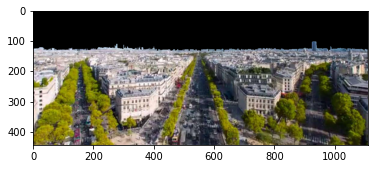

In [161]:
def horizon_1(image):
    image = cv2.imread(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 30, 150)
    horizon = horizon_from_edges(edges)
    plt.imshow(horizon, cmap = 'gray')
    plt.show()

def horizon_2(image, b=200, rg=210):
    image = cv2.imread(image)
    horizon = horizon_from_threshold(thresholg_image(image, b, rg))
    plt.imshow(horizon, cmap = 'gray')
    plt.show()

horizon_1('test_paris.jpg')
horizon_2('test_paris.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

mask = horizon>200
image_1 = image.copy()
image_1[mask] = [0,0,0]
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)) 
plt.show()

mask = horizon2>200
image_2 = image.copy()
image_2[mask] = [0,0,0]
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.show()


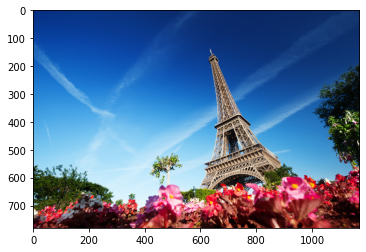

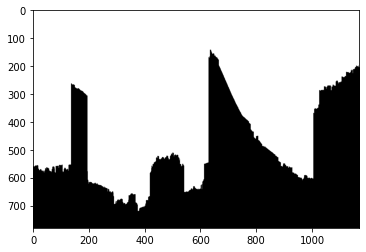

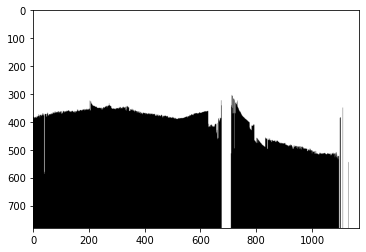

In [172]:
name = 'tour_eiffel.jpg'
image = cv2.imread(name) 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
horizon_1(name)
horizon_2(name,200,100)

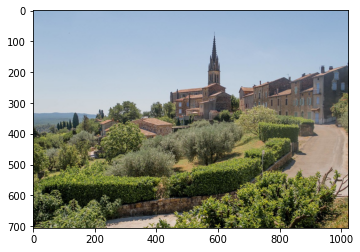

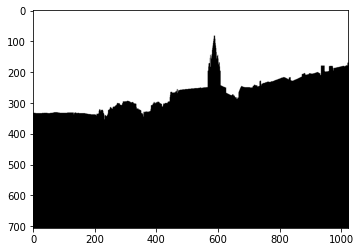

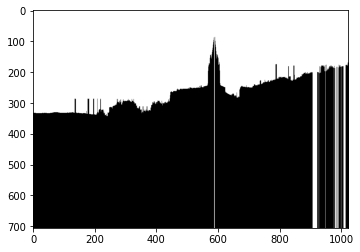

In [173]:
name = 'banne.jpg'
image = cv2.imread(name) 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
horizon_1(name)
horizon_2(name, 220, 260)

Conclusions : 

- Même si la deuxième méthode semblait mieux fonctionner sur la première image (sur laquelle je l'ai créée), elle s'adapte plus difficilement à d'autres images tant qu'on n'a pas de reconnaissance automatique de la couleur du ciel. 

- Par contre la première s'adapte bien.


Reste à trouver une manière plus adéquate de découper l'horizon (c.f. photo tour Eiffel).